> # PACKAGES AND LIBRARIES

In [83]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape,\
Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

> # PATH, LABEL, TRANSFORMATION

#### MAIN

In [2]:
Main_WAV_Path = Path("../input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data")

#### WAV PATH

In [3]:
Wav_Path = list(Main_WAV_Path.glob(r"**/*.wav"))

#### WAV LABELS

In [4]:
Wav_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Wav_Path))

#### TO SERIES

In [5]:
Wav_Path_Series = pd.Series(Wav_Path,name="WAV").astype(str)
Wav_Labels_Series = pd.Series(Wav_Labels,name="EMOTION")

#### TO DATAFRAME

In [6]:
Main_Wav_Data = pd.concat([Wav_Path_Series,Wav_Labels_Series],axis=1)

In [7]:
print(Main_Wav_Data.head(-1))

                                                    WAV  \
0     ../input/toronto-emotional-speech-set-tess/TES...   
1     ../input/toronto-emotional-speech-set-tess/TES...   
2     ../input/toronto-emotional-speech-set-tess/TES...   
3     ../input/toronto-emotional-speech-set-tess/TES...   
4     ../input/toronto-emotional-speech-set-tess/TES...   
...                                                 ...   
2794  ../input/toronto-emotional-speech-set-tess/TES...   
2795  ../input/toronto-emotional-speech-set-tess/TES...   
2796  ../input/toronto-emotional-speech-set-tess/TES...   
2797  ../input/toronto-emotional-speech-set-tess/TES...   
2798  ../input/toronto-emotional-speech-set-tess/TES...   

                     EMOTION  
0                   YAF_fear  
1                   YAF_fear  
2                   YAF_fear  
3                   YAF_fear  
4                   YAF_fear  
...                      ...  
2794  YAF_pleasant_surprised  
2795  YAF_pleasant_surprised  
2796  YAF_pl

#### TO SHUFFLE

In [9]:
Main_Wav_Data = Main_Wav_Data.sample(frac=1).reset_index(drop=True)

> # DATA PROCESS FUNCTIONS

#### NOISE

In [11]:
def add_noise(data):
    noise_value = 0.015 * np.random.uniform() * np.amax(data)
    data = data + noise_value * np.random.normal(size=data.shape[0])
    
    return data

#### STRETCH

In [12]:
def stretch_process(data,rate=0.8):
    
    return librosa.effects.time_stretch(data,rate)

#### SHIFT

In [13]:
def shift_process(data):
    shift_range = int(np.random.uniform(low=-5,high=5) * 1000)
    
    return np.roll(data,shift_range)

#### PITCH

In [14]:
def pitch_process(data,sampling_rate,pitch_factor=0.7):
    
    return librosa.effects.pitch_shift(data,sampling_rate,pitch_factor)

#### EXTRACT FEATURES

In [15]:
def extract_process(data):
    
    output_result = np.array([])
    mean_zero = np.mean(librosa.feature.zero_crossing_rate(y=data).T,axis=0)
    output_result = np.hstack((output_result,mean_zero))
    
    stft_out = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft_out,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,chroma_stft))
    
    mfcc_out = np.mean(librosa.feature.mfcc(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mfcc_out))
    
    root_mean_out = np.mean(librosa.feature.rms(y=data).T,axis=0)
    output_result = np.hstack((output_result,root_mean_out))
    
    mel_spectogram = np.mean(librosa.feature.melspectrogram(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mel_spectogram))
    
    return output_result

#### EXPORT FEATURES

In [16]:
def export_process(path):
    
    data,sample_rate = librosa.load(path,duration=2.5,offset=0.6)
    
    output_1 = extract_process(data)
    result = np.array(output_1)
    
    noise_out = add_noise(data)
    output_2 = extract_process(noise_out)
    result = np.vstack((result,output_2))
    
    new_out = stretch_process(data)
    strectch_pitch = pitch_process(new_out,sample_rate)
    output_3 = extract_process(strectch_pitch)
    result = np.vstack((result,output_3))
    
    return result

> # ANALYSIS

#### HEARING

In [17]:
rate,speech = read(Main_Wav_Data["WAV"][2342])
print(Main_Wav_Data["EMOTION"][2342])

Audio(speech,rate=rate,autoplay=False)

OAF_Fear


In [18]:
rate,speech = read(Main_Wav_Data["WAV"][3])
print(Main_Wav_Data["EMOTION"][3])

Audio(speech,rate=rate,autoplay=False)

OAF_happy


In [19]:
rate,speech = read(Main_Wav_Data["WAV"][2795])
print(Main_Wav_Data["EMOTION"][2795])

Audio(speech,rate=rate,autoplay=False)

YAF_fear


#### SHAPE - TYPE

In [20]:
rate,speech = read(Main_Wav_Data["WAV"][2795])
print(Main_Wav_Data["EMOTION"][2795])
print(speech.shape)
print(speech.dtype)
print(rate)

YAF_fear
(36952,)
int16
24414


In [21]:
rate,speech = read(Main_Wav_Data["WAV"][314])
print(Main_Wav_Data["EMOTION"][314])
print(speech.shape)
print(speech.dtype)
print(rate)

OAF_Sad
(59184,)
int16
24414


In [22]:
rate,speech = read(Main_Wav_Data["WAV"][134])
print(Main_Wav_Data["EMOTION"][134])
print(speech.shape)
print(speech.dtype)
print(rate)

YAF_disgust
(58401,)
int16
24414


#### WAVEPLOT

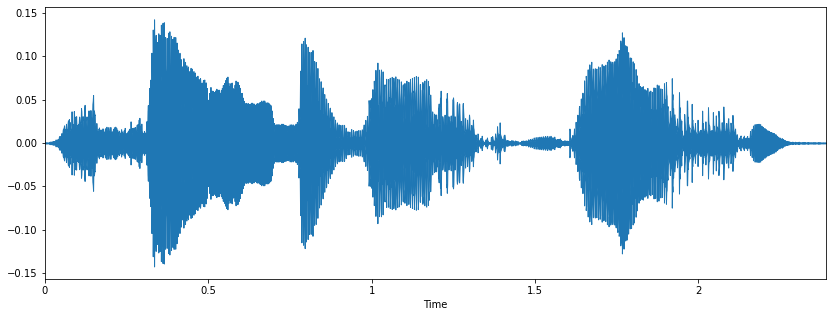

In [23]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][134])
librosa.display.waveplot(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

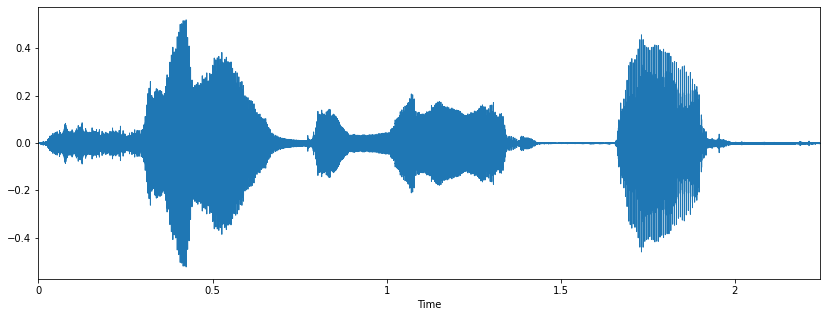

In [24]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][34])
librosa.display.waveplot(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

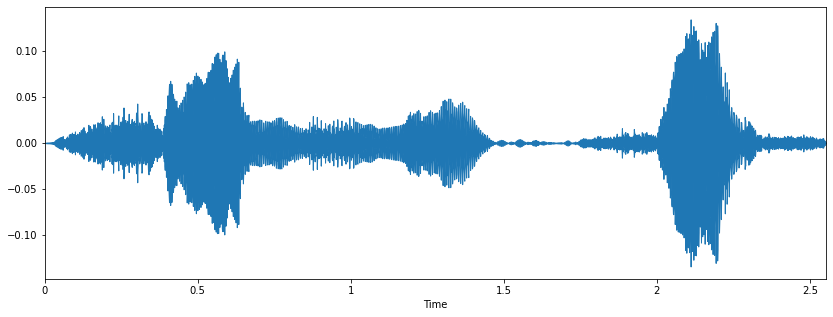

In [25]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][4])
librosa.display.waveplot(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

#### SPECSHOW

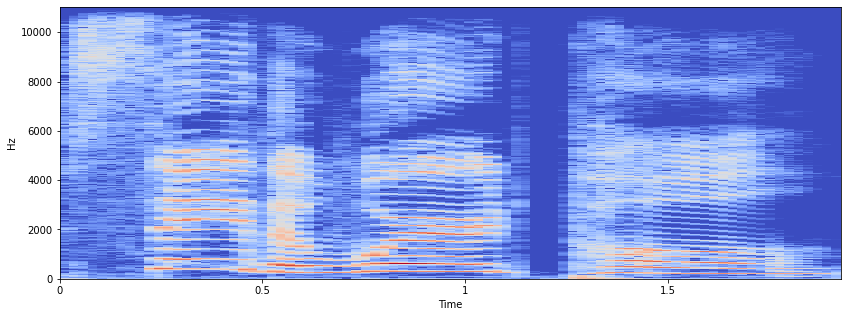

In [26]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][458])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

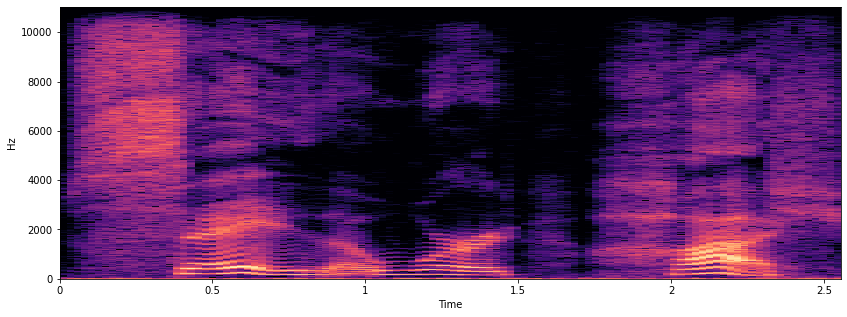

In [27]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][4])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

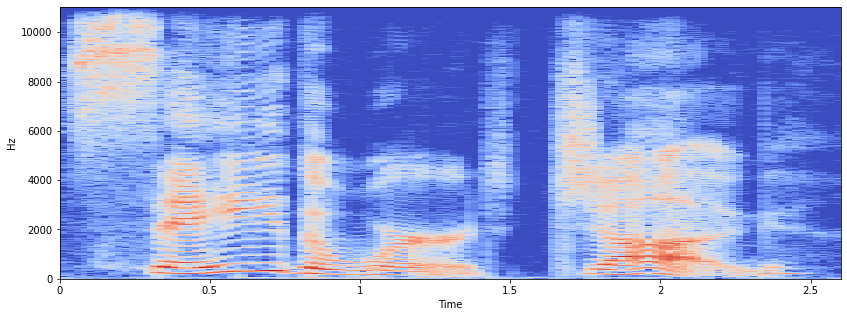

In [28]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

#### NOISE

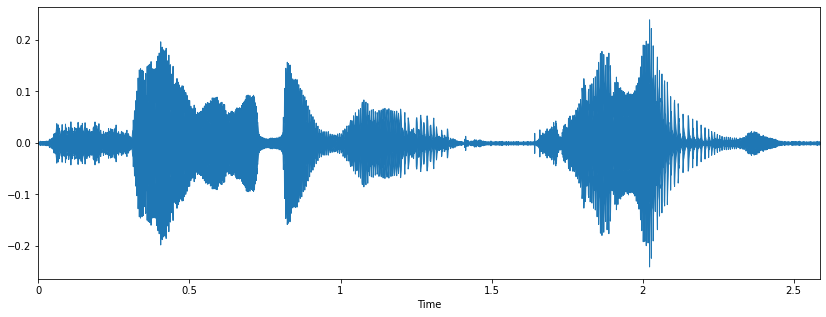

In [29]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

noise_injection = add_noise(audio_speech)

librosa.display.waveplot(noise_injection,sr=sample_rate)
Audio(noise_injection,rate=sample_rate)

#### STRETCHING

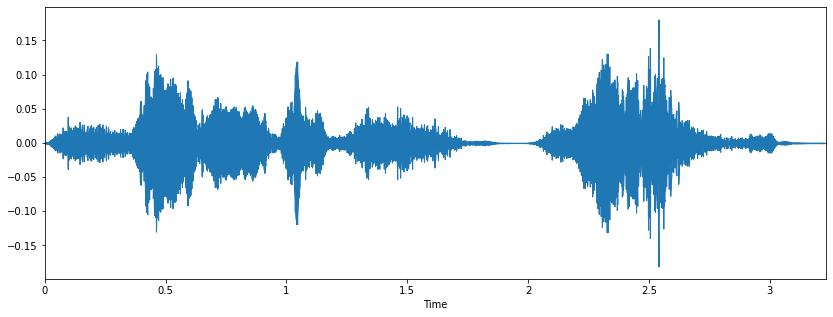

In [30]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

stretching_audio = stretch_process(audio_speech)
librosa.display.waveplot(stretching_audio,sr=sample_rate)
Audio(stretching_audio,rate=sample_rate)

#### SHIFTING

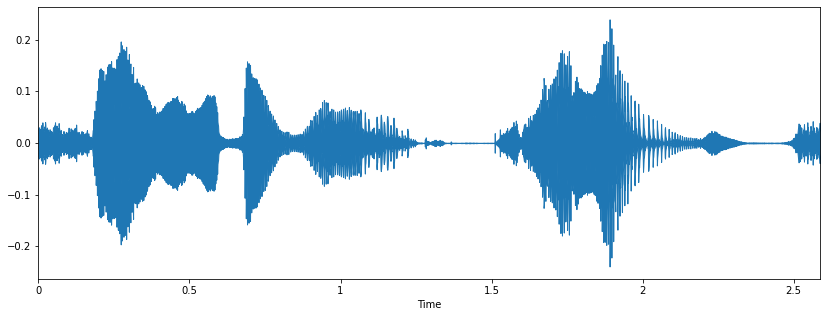

In [31]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

shifting_audio = shift_process(audio_speech)
librosa.display.waveplot(shifting_audio,sr=sample_rate)
Audio(shifting_audio,rate=sample_rate)

#### PITCH

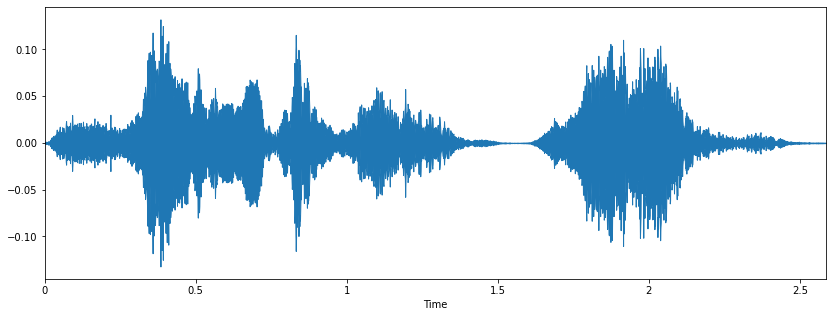

In [32]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

pitch_audio = pitch_process(audio_speech,sample_rate)
librosa.display.waveplot(pitch_audio,sr=sample_rate)
Audio(pitch_audio,rate=sample_rate)

> # DATA PROCESS AND ENGINEERING

#### TRANSFORMATION AND EXPORTATION

In [36]:
x_Train, y_Train = [],[]

for path,emotion in zip(Main_Wav_Data.WAV,Main_Wav_Data.EMOTION):
    
    features = export_process(path)
    
    for element in features:
        x_Train.append(element)
        y_Train.append(emotion)

In [37]:
print(len(x_Train))
print(len(y_Train))
print(len(Main_Wav_Data.WAV))

8400
8400
2800


In [38]:
print(x_Train[0].shape)

(162,)


In [39]:
print(y_Train[0:5])

['OAF_Fear', 'OAF_Fear', 'OAF_Fear', 'OAF_Sad', 'OAF_Sad']


In [40]:
New_Features_Wav = pd.DataFrame(x_Train)
New_Features_Wav["EMOTIONS"] = y_Train

New_Features_Wav.to_csv("New_Wav_Set.csv",index=False)

In [41]:
New_Features_Wav.head(-1)

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,EMOTIONS
0,0.038847,0.429017,0.741311,0.733289,0.413316,0.221045,0.194722,0.218056,0.224820,0.336726,...,0.000153,0.000103,0.000046,0.000087,0.000094,0.000054,0.000017,0.000004,3.257349e-07,OAF_Fear
1,0.048760,0.444860,0.751777,0.749446,0.436796,0.241089,0.201594,0.220519,0.232346,0.349725,...,0.000167,0.000114,0.000059,0.000101,0.000105,0.000064,0.000028,0.000017,1.257277e-05,OAF_Fear
2,0.052688,0.220012,0.298621,0.633612,0.855473,0.565582,0.258015,0.185761,0.199469,0.216490,...,0.000040,0.000057,0.000035,0.000014,0.000015,0.000029,0.000016,0.000003,1.440357e-07,OAF_Fear
3,0.075464,0.311104,0.322311,0.327135,0.330504,0.354411,0.445928,0.541974,0.554818,0.549458,...,0.000018,0.000010,0.000008,0.000017,0.000026,0.000032,0.000046,0.000016,6.997270e-07,OAF_Sad
4,0.075539,0.311700,0.322499,0.327041,0.330728,0.355181,0.446944,0.542238,0.555422,0.549785,...,0.000018,0.000010,0.000008,0.000017,0.000026,0.000032,0.000046,0.000016,7.052381e-07,OAF_Sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,0.092442,0.461243,0.385754,0.505789,0.318701,0.219668,0.276573,0.465933,0.421127,0.364611,...,0.013228,0.004696,0.010284,0.007978,0.003755,0.002579,0.001477,0.000823,8.748151e-05,YAF_happy
8395,0.127303,0.487668,0.423660,0.540041,0.357278,0.267130,0.305761,0.485345,0.444311,0.397813,...,0.013346,0.004912,0.010571,0.008241,0.003849,0.002738,0.001588,0.000947,2.247052e-04,YAF_happy
8396,0.134773,0.473511,0.578791,0.440334,0.589554,0.427373,0.247234,0.268585,0.456257,0.479135,...,0.003645,0.004814,0.002496,0.001401,0.001746,0.001230,0.000619,0.000147,8.473373e-06,YAF_happy
8397,0.118030,0.584174,0.574646,0.674732,0.561899,0.357888,0.321366,0.358522,0.356964,0.435070,...,0.001175,0.000826,0.000445,0.000393,0.000492,0.000294,0.000163,0.000066,9.256214e-06,YAF_happy


#### SPLITTING

In [43]:
encoder_label = OneHotEncoder()

In [44]:
scaler_data = StandardScaler()

In [45]:
X = New_Features_Wav.iloc[:,:-1].values
Y = New_Features_Wav["EMOTIONS"].values

In [47]:
Y = encoder_label.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [49]:
xTrain,xTest,yTrain,yTest = train_test_split(X,Y,train_size=0.9,random_state=42,shuffle=True)

In [51]:
xTrain = scaler_data.fit_transform(xTrain)
xTest = scaler_data.transform(xTest)

In [53]:
xTrain = np.expand_dims(xTrain,axis=2)
xTest = np.expand_dims(xTest,axis=2)

# MODEL STRUCTURE

In [55]:
Model=Sequential()
Model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(xTrain.shape[1], 1)))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
Model.add(Dropout(0.2))

Model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Flatten())
Model.add(Dense(units=32, activation='relu'))
Model.add(Dropout(0.3))

Model.add(Dense(units=14, activation='softmax'))

In [56]:
Model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [57]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")

In [58]:
Conv1D_Model = Model.fit(xTrain, yTrain, batch_size=64, epochs=50, validation_data=(xTest, yTest), callbacks=[early_stop])

Epoch 1/50
119/119 [==============================] - 12s 19ms/step - loss: 2.2460 - accuracy: 0.2414 - val_loss: 1.0294 - val_accuracy: 0.6762
Epoch 2/50
119/119 [==============================] - 1s 10ms/step - loss: 1.0707 - accuracy: 0.6320 - val_loss: 0.5286 - val_accuracy: 0.8429
Epoch 3/50
119/119 [==============================] - 1s 11ms/step - loss: 0.7553 - accuracy: 0.7334 - val_loss: 0.3618 - val_accuracy: 0.8833
Epoch 4/50
119/119 [==============================] - 1s 10ms/step - loss: 0.5052 - accuracy: 0.8224 - val_loss: 0.2948 - val_accuracy: 0.9012
Epoch 5/50
119/119 [==============================] - 1s 10ms/step - loss: 0.4002 - accuracy: 0.8653 - val_loss: 0.1878 - val_accuracy: 0.9429
Epoch 6/50
119/119 [==============================] - 1s 10ms/step - loss: 0.3995 - accuracy: 0.8753 - val_loss: 0.1678 - val_accuracy: 0.9452
Epoch 7/50
119/119 [==============================] - 1s 10ms/step - loss: 0.2547 - accuracy: 0.9145 - val_loss: 0.1412 - val_accuracy: 0.950

In [59]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 162, 256)          1536      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 81, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 81, 256)           327936    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 41, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 41, 128)           163968    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 21, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 21, 128)           0

<AxesSubplot:>

<Figure size 720x720 with 0 Axes>

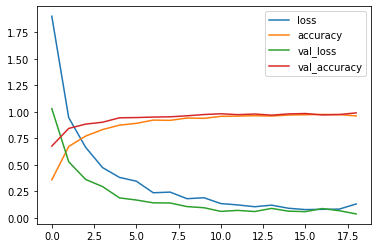

In [60]:
Grap_Data = pd.DataFrame(Conv1D_Model.history)
figure = plt.figure(figsize=(10,10))
Grap_Data.plot()

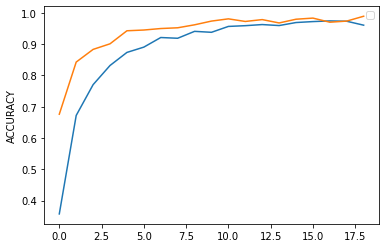

In [61]:
plt.plot(Conv1D_Model.history["accuracy"])
plt.plot(Conv1D_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

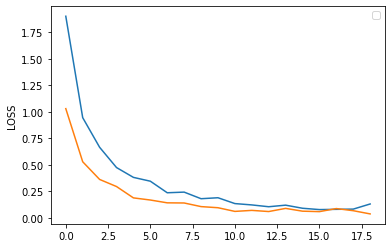

In [62]:
plt.plot(Conv1D_Model.history["loss"])
plt.plot(Conv1D_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

#### PREDICTION

In [63]:
Model_Results = Model.evaluate(xTest,yTest)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])

27/27 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9893
LOSS:  0.0367
ACCURACY:  0.9893


In [64]:
prediction_test = Model.predict(xTest)
y_prediction = encoder_label.inverse_transform(prediction_test)

yTest = encoder_label.inverse_transform(yTest)

In [68]:
conf_matrix = confusion_matrix(yTest, y_prediction)

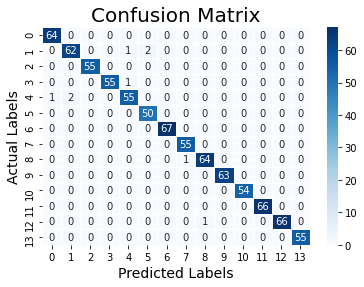

In [69]:
sns.heatmap(conf_matrix, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')

plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [70]:
print(classification_report(yTest, y_prediction))

                        precision    recall  f1-score   support

              OAF_Fear       0.98      1.00      0.99        64
 OAF_Pleasant_surprise       0.97      0.95      0.96        65
               OAF_Sad       1.00      1.00      1.00        55
             OAF_angry       1.00      0.98      0.99        56
           OAF_disgust       0.96      0.95      0.96        58
             OAF_happy       0.96      1.00      0.98        50
           OAF_neutral       1.00      1.00      1.00        67
             YAF_angry       0.98      1.00      0.99        55
           YAF_disgust       0.98      0.98      0.98        65
              YAF_fear       1.00      1.00      1.00        63
             YAF_happy       1.00      1.00      1.00        54
           YAF_neutral       1.00      1.00      1.00        66
YAF_pleasant_surprised       1.00      0.99      0.99        67
               YAF_sad       1.00      1.00      1.00        55

              accuracy                

In [82]:
print(f"Accuracy: {accuracy_score(yTest, y_prediction)}")

Accuracy: 0.9892857142857143
